#<center>Построение и оценка качества бейзлайна</center>

#Построение бейзлайна

В качестве бейзлайн-модели в данной работы была выбрана логистическая регрессиия. Данный выбор обоснован тем, что логистическая регрессия - простая и легко интерпретируемая модель для бинарной классификации. Она имеет ряд преимуществ для задач бинарной классификации и, в целом, часто используется в подобных моей задачах.

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

Все данные в моём  датасете, подробное описане которого можно увидеть в первой ДЗ, кодируются методом Label Encoding, поскольку этот метод позволяет программе работать с численными значениями, что упрощает программму и ускоряет работу (да и в целом любая программа "внутри себя" работает только с числовыми значениями). Кодирование данных было произведено не мной. Датасет в открытом доступе уже был представлен в таком формате, что говорит о том, что либо данные заранее обработали, либо их изначально собирали в таком виде с рассчётом на обработку компьютерными программами (что неудивительно, ведь там было 263 тысячи строк).

Тем не менее, необходимо  произвести ещё одну операцию с данными - масштабирование. Необходиость масштабирования данных изначально была сомнительной ввиду низкой разницы принимаемых столбцами значений, однако без него модель работала плохо.

In [9]:
data = pd.read_csv("Dataset.csv", sep=";")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop("HeartDiseaseorAttack", axis=1))

Затем построим модель, взяв за тестовую часть 20% от нашей выборки (20-30% - общепринятая практика) и задав зерно ГПСЧ - 42. Максимальное число иттераций - 1000 (также общепринятая практика, в случае проблем данное число можно изменить).

In [45]:
X = pd.DataFrame(X_scaled, columns=data.columns[1:])
y = data["HeartDiseaseorAttack"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

#Оценка качества бейзлайна

In [37]:
from sklearn.metrics import roc_curve, auc
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Оценку качества модели произведём при помощи ранее выбранной метрики ROC-AUC.

In [36]:
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc}")

ROC-AUC: 0.8055906201734586


Для наглядности построим график

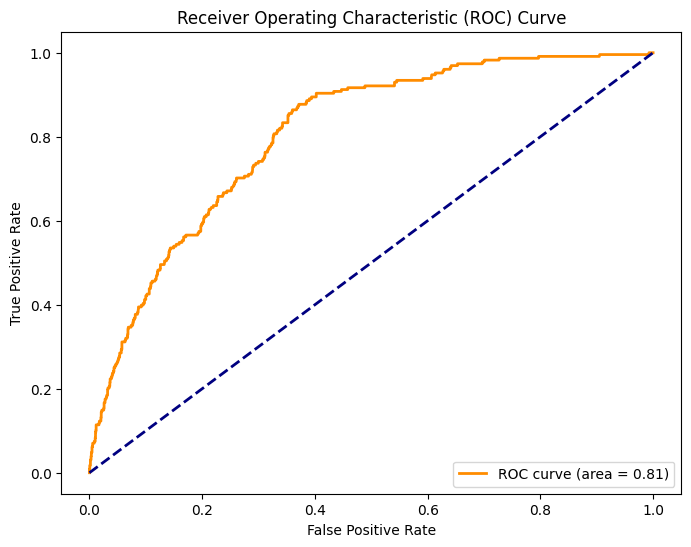

In [38]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

0,8056 - весьма неплохой результат для столь простого бейзлайна. Можно и лучше, но это уже третья ДЗ.

Теперь произведём оценку качества константного предсказания.

In [46]:
y_pred_proba_dummy = dummy_clf.predict_proba(X_test)[:, 1]

roc_auc_dummy = roc_auc_score(y_test, y_pred_proba_dummy)
print(f"ROC-AUC for Dummy Classifier: {roc_auc_dummy}")

ROC-AUC for Dummy Classifier: 0.5


Значение ROC-AUC для константного предсказания составляет 0.5. Логчино, ведь такая модель не имеет предсказательной силы, поскольку всегда предсказывает "Низкий риск инфаркта".

Как выглядит график представить нетрудно, но я сделаю его.

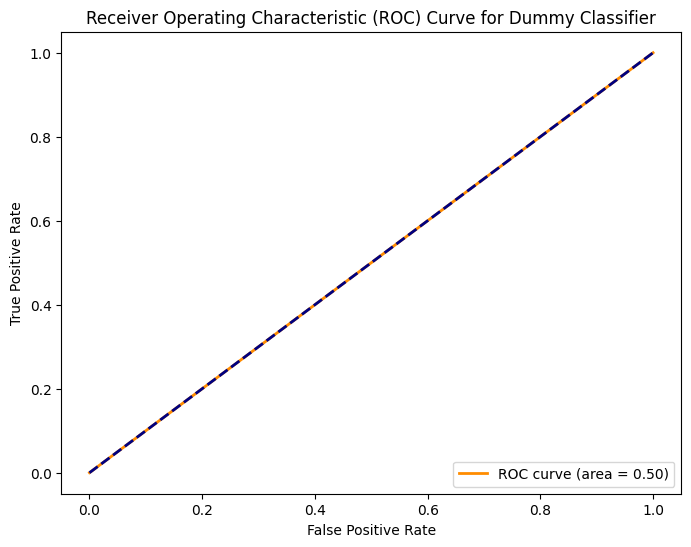

In [43]:
y_pred_proba_dummy = dummy_clf.predict_proba(X_test)[:, 1]

# Вычисление ROC-кривой и ее площади (AUC) для константной модели
fpr_dummy, tpr_dummy, thresholds_dummy = roc_curve(y_test, y_pred_proba_dummy)
roc_auc_dummy = auc(fpr_dummy, tpr_dummy)

# Построение ROC-кривой для константной модели
plt.figure(figsize=(8, 6))
plt.plot(fpr_dummy, tpr_dummy, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_dummy:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Dummy Classifier')
plt.legend(loc='lower right')
plt.show()


Идеальное совпадение.